# Evaluating each RAG pipeline using langsmith

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

# Load environment variables from the .env file using 'from dotenv import find_dotenv, load_dotenv'
load_dotenv(find_dotenv(filename='SURF-Project_Optimizing-PerunaBot/setup/.env'))

openai_api_key = os.environ['OPENAI_API_KEY']

In [2]:
import nest_asyncio
nest_asyncio.apply()

Importing the 4 different RAG pipelines we made for each evaluation.

In [3]:
from OG_PerunaBot_chain import Original_PerunaBot_eval_chain
from chain_0 import base_retriever_eval_chain_0
from chain_1 import parent_retriever_eval_chain_1
from chain_2 import ensemble_retriever_eval_chain_2

In [4]:
from langsmith.evaluation import evaluate, LangChainStringEvaluator

# Target task definition

# The name or UUID of the LangSmith dataset to evaluate on.

data = "SMU Schools QA"

# A string to prefix the experiment name with.
# If not provided, a random string will be generated.
experiment_prefix = "SMU Schools QA"

# List of evaluators to score the outputs of target task
evaluators = [
  LangChainStringEvaluator("cot_qa"),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "detail"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "coherence"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "relevance"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "helpfulness"})
]


In [5]:
def predict_OG_chain(inputs: dict):
    response = Original_PerunaBot_eval_chain.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_0(inputs: dict):
    response = base_retriever_eval_chain_0.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_1(inputs: dict):
    response = parent_retriever_eval_chain_1.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_2(inputs: dict):
    response = ensemble_retriever_eval_chain_2.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

In [ ]:

# Evaluate the target task
OG_PerunaBot_langsmith_eval = evaluate(
  predict_OG_chain,
  data=data,
  evaluators=evaluators,
  experiment_prefix=experiment_prefix + " on OG PerunaBot chain",
)

View the evaluation results for experiment: 'SMU Schools QA on OG PerunaBot chain-a304c553' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/7a23c577-228e-4b2b-a8af-c9e0a13c1625/compare?selectedSessions=ecf88071-640f-4256-974d-9fd4d1a97eac




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 98231041-a269-4f41-a1d5-2968d0514a2e: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9956, Requested 455. Please try again in 2.466s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [10]:
chain_0_langsmith_eval = evaluate(
    predict_chain_0,
    data=data,
    evaluators=evaluators,
    experiment_prefix=experiment_prefix + " on chain 0",
    )

View the evaluation results for experiment: 'SMU Schools QA on chain 0-84b421e8' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/7a23c577-228e-4b2b-a8af-c9e0a13c1625/compare?selectedSessions=6e309932-01f3-4527-8494-e22d3aea26a3




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run fa9943e0-e122-434b-8408-9b13e89eb842: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9987, Requested 447. Please try again in 2.604s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [11]:

chain_1_langsmith_eval = evaluate(
    predict_chain_1,
    data=data,
    evaluators=evaluators,
    experiment_prefix=experiment_prefix + " on chain 1",
    )


View the evaluation results for experiment: 'SMU Schools QA on chain 1-218c12d4' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/7a23c577-228e-4b2b-a8af-c9e0a13c1625/compare?selectedSessions=f3f2b3db-eb84-40b3-89b5-15243b76b76c




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 85141248-c6ff-43c9-a196-1e40471c7212: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9974, Requested 471. Please try again in 2.67s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\ya

In [12]:

chain_2_langsmith_eval = evaluate(
    predict_chain_2,
    data=data,
    evaluators=evaluators,
    experiment_prefix=experiment_prefix + " on chain 2",
    )

View the evaluation results for experiment: 'SMU Schools QA on chain 2-bc545425' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/7a23c577-228e-4b2b-a8af-c9e0a13c1625/compare?selectedSessions=741bccb0-8b19-42a9-a919-523e38be7eb7




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 1efeb8bd-5d78-4f16-aaad-5a89628dbedd: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9973, Requested 458. Please try again in 2.586s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [6]:
from ragas.integrations.langchain import EvaluatorChain as RagasEvaluatorChain
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_utilization
)

# create evaluation chains
faithfulness_chain = RagasEvaluatorChain(metric=faithfulness)
answer_rel_chain = RagasEvaluatorChain(metric=answer_relevancy)
context_util_chain = RagasEvaluatorChain(metric=context_utilization)

ragas_evaluators = [
    faithfulness_chain,
    answer_rel_chain,
    context_util_chain
]

dataset_2 = "RAGAS Testset QA"

In [7]:
def predict_OG_chain_with_context(input: dict):
    response = Original_PerunaBot_eval_chain.invoke({"question": input["question"]})
    return {"answer": response["output"], "contexts": response["context"]}

def predict_chain_0_with_context(input: dict):
    response = base_retriever_eval_chain_0.invoke({"question": input["question"]})
    return {"answer": response["output"], "contexts": response["context"]}

def predict_chain_1_with_context(input: dict):
    response = parent_retriever_eval_chain_1.invoke({"question": input["question"]})
    return {"answer": response["output"], "contexts": response["context"]}

def predict_chain_2_with_context(input: dict):
    response = ensemble_retriever_eval_chain_2.invoke({"question": input["question"]})
    return {"answer": response["output"], "contexts": response["context"]}

In [ ]:
# Evaluate the target task
OG_PerunaBot_ragas_langsmith_eval = evaluate(
  predict_OG_chain_with_context,
  data=dataset_2,
  evaluators=ragas_evaluators,
  experiment_prefix="OG PerunaBot chain",
)


In [8]:

chain_0_ragas_langsmith_eval = evaluate(
    predict_chain_0_with_context,
    data=dataset_2,
    evaluators=ragas_evaluators,
    experiment_prefix="chain 0",
    )


View the evaluation results for experiment: 'chain 0-8d0b3f5a' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/3643247a-7c6c-40d9-927e-ae50f5055df5/compare?selectedSessions=b7c5970b-a793-4d6a-968f-44537eba5bd2




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 28136, Requested 2975. Please try again in 2.222s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running evaluator EvaluatorChain(metric=Faithfulness(llm=LangchainLLMWrapper(run_config=RunConfig(timeout=60, max_retries=10, max_wait=60, max_workers=16, thread_timeout=80.0, exception_types=<class 'openai.RateLimitError'>, log_tenacity=False)), name='faithfulness', evaluation_mode=<EvaluationMode.qac: 1>, nli_statements_message=Prompt(name='nli_statements', instruction='Your task is to judge the faithfulness of a series of statements based on a given context. For each statement you must return verdict as 1 if the statement can be directly inferred based on the context or 0 if the statement can not be directl

In [8]:

chain_1_ragas_langsmith_eval = evaluate(
    predict_chain_1_with_context,
    data=dataset_2,
    evaluators=ragas_evaluators,
    experiment_prefix="chain 1",
    )


View the evaluation results for experiment: 'chain 1-248e040c' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/3643247a-7c6c-40d9-927e-ae50f5055df5/compare?selectedSessions=d43cb0fe-b6b9-4599-9f7b-d644e19674b1




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 27254, Requested 3209. Please try again in 926ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29767, Requested 3257. Please try again in 6.048s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 27944, Requested 3315. Please try again in 2.518s. Visit 

In [8]:

chain_2_ragas_langsmith_eval = evaluate(
    predict_chain_2_with_context,
    data=dataset_2,
    evaluators=ragas_evaluators,
    experiment_prefix="chain 2",
    )

View the evaluation results for experiment: 'chain 2-c52d3c61' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/3643247a-7c6c-40d9-927e-ae50f5055df5/compare?selectedSessions=fbfa5c22-9704-4cbe-b672-dc68e93f4551




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29163, Requested 3750. Please try again in 5.826s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29051, Requested 3899. Please try again in 5.9s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 27343, Requested 2703. Please try again in 92ms. Visit htt

In [9]:
from langsmith.evaluation import evaluate, LangChainStringEvaluator

# Target task definition

# The name or UUID of the LangSmith dataset to evaluate on.
# Alternatively, you can pass an iterator of examples
dataset_3 = "SMU Schools Questions"


# List of evaluators to score the outputs of target task
langsmith_evaluators = [
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "detail"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "coherence"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "relevance"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "helpfulness"})
]

In [ ]:
def predict_OG_chain(inputs: dict):
    response = Original_PerunaBot_eval_chain.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_0(inputs: dict):
    response = base_retriever_eval_chain_0.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_1(inputs: dict):
    response = parent_retriever_eval_chain_1.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_2(inputs: dict):
    response = ensemble_retriever_eval_chain_2.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

In [10]:
OG_PerunaBot_langsmith_eval_2 = evaluate(
    predict_OG_chain,
    data=dataset_3,
    evaluators=langsmith_evaluators,
    experiment_prefix="OG PerunaBot chain"
)

View the evaluation results for experiment: 'OG PerunaBot chain-39986212' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=77674d36-5c7f-40ab-aac5-9ade509cd489




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run e5b01709-c139-4df4-be2f-b067cbf3c941: ValueError('LabeledCriteriaEvalChain requires a reference string.')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 582, in wrapper
    raise e
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 579, 

In [11]:

chain_0_langsmith_eval_2 = evaluate(
    predict_chain_0,
    data=dataset_3,
    evaluators=langsmith_evaluators,
    experiment_prefix="chain 0"
)


View the evaluation results for experiment: 'chain 0-1f26194d' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=40dba849-ef43-4fc2-85f6-2ac2fb331aeb




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 67c3d8ce-b579-4d1e-8e53-ccb99043cb75: ValueError('LabeledCriteriaEvalChain requires a reference string.')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 582, in wrapper
    raise e
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 579, 

In [12]:

chain_1_langsmith_eval_2 = evaluate(
    predict_chain_1,
    data=dataset_3,
    evaluators=langsmith_evaluators,
    experiment_prefix="chain 1"
)


View the evaluation results for experiment: 'chain 1-30610d12' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=0f8bfae4-12be-4d93-becd-9d480a978689




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 86e982a7-a2c4-40cb-b19d-6ee6f2aff587: ValueError('LabeledCriteriaEvalChain requires a reference string.')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 582, in wrapper
    raise e
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 579, 

In [13]:

chain_2_langsmith_eval_2 = evaluate(
    predict_chain_2,
    data=dataset_3,
    evaluators=langsmith_evaluators,
    experiment_prefix="chain 2"
)

View the evaluation results for experiment: 'chain 2-83a99ce8' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=0d993ac0-9056-4302-828d-f57baa5f933d




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 73769364-8264-4e01-9c6e-391062925a4b: ValueError('LabeledCriteriaEvalChain requires a reference string.')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 582, in wrapper
    raise e
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 579, 

## Pairwise evaluations

In [35]:
from langsmith.evaluation import evaluate_comparative
from langchain import hub
from langchain_openai import ChatOpenAI
from langsmith.schemas import Run, Example

prompts = {
    "prompt" : hub.pull("langchain-ai/pairwise-evaluation-2"),
    "rag prompt" : hub.pull("langchain-ai/pairwise-evaluation-rag"),
    "academic advisor prompt" : hub.pull("perunabot-pairwise-evaluation")
}


Using Normal Prompt

In [36]:

def evaluate_pairwise_with_prompt(runs: list[Run], example: Example):
    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model_name="gpt-4o")
    
    runnable = prompts["prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["question"],
        "answer_a": runs[0].outputs["answer"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["answer"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}


In [ ]:
# OG PerunaBot vs Chain 0
pairwise_eval_1 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 0-1f26194d"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="OG PerunaBot vs Chain 0",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 0",
              "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# OG PerunaBot vs Chain 1
pairwise_eval_2 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="OG PerunaBot vs Chain 1",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 1",
             "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# OG PerunaBot vs Chain 2
pairwise_eval_3 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="OG PerunaBot vs Chain 2",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# Chain 0 vs Chain 1
pairwise_eval_4 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="Chain 0 vs Chain 1",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 1",
             "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# Chain 0 vs Chain 2
pairwise_eval_5 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="Chain 0 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# Chain 1 vs Chain 2
pairwise_eval_6 = evaluate_comparative(
    ["chain 1-30610d12", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="Chain 1 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 1 vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

### Results

![Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation%20v1%207-30.png)

Using RAG Prompt

In [37]:

def evaluate_pairwise_with_rag_prompt(runs: list[Run], example: Example):
    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model_name="gpt-4o")
    
    runnable = prompts["rag prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["question"],
        "answer_a": runs[0].outputs["answer"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["answer"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}


In [ ]:
# OG PerunaBot vs Chain 0
pairwise_eval_1 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 0-1f26194d"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="OG PerunaBot vs Chain 0",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 0",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# OG PerunaBot vs Chain 1
pairwise_eval_2 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="OG PerunaBot vs Chain 1",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 1",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# OG PerunaBot vs Chain 2
pairwise_eval_3 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="OG PerunaBot vs Chain 2",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# Chain 0 vs Chain 1
pairwise_eval_4 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="Chain 0 vs Chain 1",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 1",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# Chain 0 vs Chain 2
pairwise_eval_5 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="Chain 0 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# Chain 1 vs Chain 2
pairwise_eval_6 = evaluate_comparative(
    ["chain 1-30610d12", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="Chain 1 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 1 vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

### Results

![Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation%20v2%207-30.png)

Using Academic Advisor Prompt

In [38]:

def evaluate_pairwise_with_advisor_prompt(runs: list[Run], example: Example):
    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model_name="gpt-4o")
    
    runnable = prompts["academic advisor prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["question"],
        "answer_a": runs[0].outputs["answer"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["answer"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}


In [33]:
# OG PerunaBot vs Chain 0
pairwise_eval_1 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 0-1f26194d"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="OG PerunaBot vs Chain 0",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 0",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# OG PerunaBot vs Chain 1
pairwise_eval_2 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="OG PerunaBot vs Chain 1",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 1",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# OG PerunaBot vs Chain 2
pairwise_eval_3 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="OG PerunaBot vs Chain 2",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 2",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# Chain 0 vs Chain 1
pairwise_eval_4 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="Chain 0 vs Chain 1",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 1",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# Chain 0 vs Chain 2
pairwise_eval_5 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="Chain 0 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 2",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# Chain 1 vs Chain 2
pairwise_eval_6 = evaluate_comparative(
    ["chain 1-30610d12", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="Chain 1 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 1 vs Chain 2",
              "prompt" : "perunabot-pairwise-evaluation"}
)

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=77674d36-5c7f-40ab-aac5-9ade509cd489%2C40dba849-ef43-4fc2-85f6-2ac2fb331aeb&comparativeExperiment=1048b5ad-3b25-46ab-8e2b-27f4e5dc0a25




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=77674d36-5c7f-40ab-aac5-9ade509cd489%2C0f8bfae4-12be-4d93-becd-9d480a978689&comparativeExperiment=80d0a129-9728-4ae4-bbc7-976fdc81baf2




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=77674d36-5c7f-40ab-aac5-9ade509cd489%2C0d993ac0-9056-4302-828d-f57baa5f933d&comparativeExperiment=7f7c7de0-45c6-4970-aa46-a627fe8bc1bc




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=40dba849-ef43-4fc2-85f6-2ac2fb331aeb%2C0f8bfae4-12be-4d93-becd-9d480a978689&comparativeExperiment=17f0e8f5-371c-407b-9af7-970943f6cb66




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=40dba849-ef43-4fc2-85f6-2ac2fb331aeb%2C0d993ac0-9056-4302-828d-f57baa5f933d&comparativeExperiment=a985e125-8cf1-4990-9cdd-1422a91a0a3f




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=0f8bfae4-12be-4d93-becd-9d480a978689%2C0d993ac0-9056-4302-828d-f57baa5f933d&comparativeExperiment=b3e2db54-c774-434c-b812-28ca43c74cd4




  0%|          | 0/8 [00:00<?, ?it/s]

### Results

![Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation%20v3%207-30.png)


### Visualization

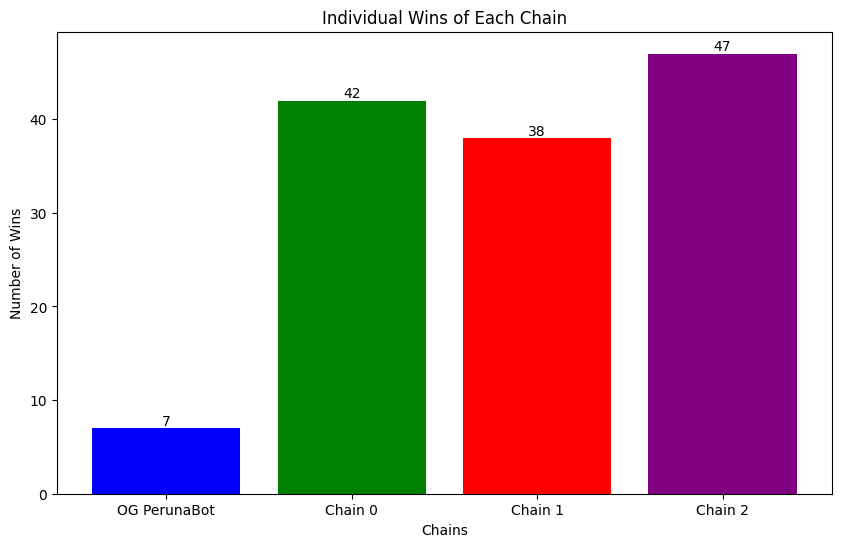

In [40]:
import matplotlib.pyplot as plt

# Data with corrected ties
individual_wins = {
    "OG PerunaBot": 7,
    "Chain 0": 42,
    "Chain 1": 38,
    "Chain 2": 47
}

# Extracting data
chains = list(individual_wins.keys())
wins = list(individual_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, wins, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Chains')
plt.ylabel('Number of Wins')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, wins[i], str(wins[i]), ha='center', va='bottom')

plt.title('Individual Wins of Each Chain')
plt.show()

In [ ]:
# Data with corrected ties
individual_wins = {
    "OG PerunaBot": 7,
    "Chain 0": 42,
    "Chain 1": 38,
    "Chain 2": 47
}

print("Win percentage of each chain (out of 72 total comparisons):")
for i in individual_wins:
    win_percentage = ((individual_wins[i] / 72) * 100).__round__(2)
    print(f"{i}: {win_percentage}%")

Win percentage of each chain (out of 72 total comparisons):
OG PerunaBot: 9.72%
Chain 0: 58.33%
Chain 1: 52.78%
Chain 2: 65.28%


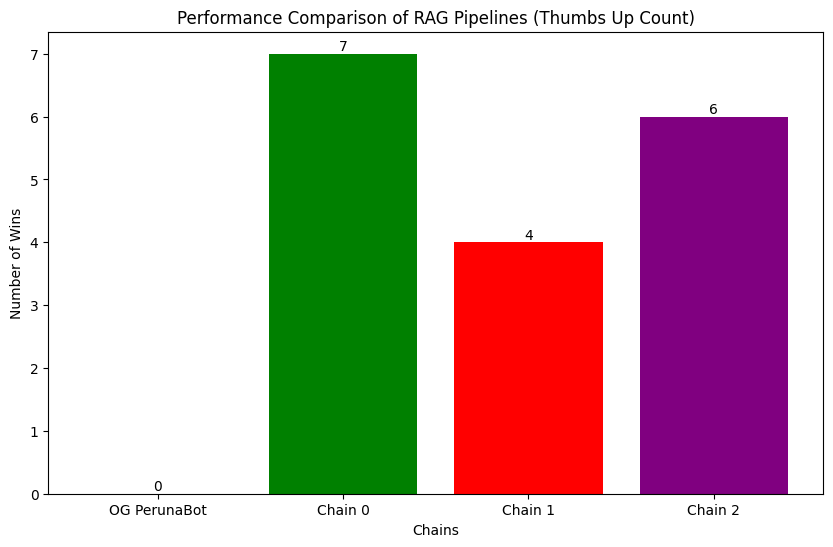

In [42]:
import matplotlib.pyplot as plt

# Data with wins based on thumbs up
overall_wins = {
    "OG PerunaBot": 0,
    "Chain 0": 7,
    "Chain 1": 4,
    "Chain 2": 6
}

# Extracting data
chains = list(overall_wins.keys())
thumbs_up_wins = list(overall_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, thumbs_up_wins, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Chains')
plt.ylabel('Number of Wins')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, thumbs_up_wins[i], str(thumbs_up_wins[i]), ha='center', va='bottom')

plt.title('Performance Comparison of RAG Pipelines (Thumbs Up Count)')
plt.show()